# 딥러닝(Deep Learning)

## 1. 인공 신경망(Perceptron)
- 실제 인간의 뇌의 신경계를 구성하는 기본단위인 `뉴런`을 바탕으로 만든 것
- 입력 값(피처 데이터)를 뉴런에 연결

### 퍼셉트론의 구성요소 : $x$, $w$
- 각 피처 데이터($x$)마다 가중치($w$)가 설정되어 해당 피처를 얼만큼 강조할지 정해준다.
- 인공 신경망(퍼셉트론)의 학습 = 최적의 $w$ 값을 찾는 것
- 각 뉴런은 피처값과 가중치 값은 내적을 통해 피처와 가중치의 선형조합의 값 $z$를 가진다.

$$
z = W^T X = \sum_{i=1}^N w_i x_i
$$

- $z$의 값에 따라 **0과 1로 분류하는 모델**을 일반적으로 퍼셉트론이라고 한다.
    - $z > 0 → 1$
    - $z < 0 → 0$
    - 위와 같은 함수를 계단(Step) 함수라고 한다.
    - 계단 함수를 이용하니 출력값이 너무 단조롭기 때문에, 보다 다채롭게 분류할 수 있도록 활성화 함수를 적용시키게 된다.



## 2. 다층 퍼셉트론(MLP; Multilayer Perceptron)
- 퍼셉트론이 다층으로 쌓인 것으로, 퍼셉트론이 계속 깊어지기 때문에 MLP를 딥러닝이라고 부른다.
- 구성요소 : 입력층, 은닉층(1개 이상), 출력층
- MLP에 존재하는 각 노드들은 뉴런 or 유닛이라고 지칭한다.

## 3. 활성화 함수
- 활성화 함수는 인공 신경망에서 입력을 변환하는 함수이다.
- 활성화 함수를 사용해야 신경망의 층을 깊게 하는 의미가 있다.
- 활성화 함수를 선형 함수를 이용하면 신경망의 층을 깊게하는 의미가 없어지기 때문에(너무 단순한 출력 결과) 비선형 함수로만 사용

- 입력 및 평탄화를 수행한 후, 은닉층에서부터 뉴런(유닛)을 활성화 함수(Activation Function)에 통과시키는 옵션 가능
  - 즉, 활성화 함수를 사용하는 것은 선택 사항
  - 나중에 정리한 자료 전달해주실 예정

### 1. Sigmoid(시그모이드) 함수
- 0부터 1까지를 표현하는 S자 곡선 형태의 함수
- Logistic Regression 에서 다루어 본 적이 있다.
- 복잡한 딥러닝 모델에서 처리하기 어렵기 때문에, 층(layer)이 깊어지면 한계가 존재해서 거의 사용하지 않는다.

### 2. ReLu 함수
- $z > 0 → z$
- $z < 0 → 0$
- 거의 모든 곳에 사용하기 좋은 함수
- ReLu 함수 종류도 다양하지만 우리는 위 기능을 가진 ReLu 함수만 다루겠다.
- **이미지 처리**에서 두각을 보인다.

### 3. hyperbolic tangent(하이퍼볼릭 탄젠트) 함수
- -1부터 1까지를 표현하는 S자 곡선 형태의 함수(시그모이드 함수와 비슷)
- 자연어 처리에서 두각을 보인다.

# Tensorflow를 이용한 MLP 모델링 실습
- Tensor : 다차원의 배열
- flow : 흐름

## Colab 사전 설정
- Google Colab 수정 탭 > 노트 설정 > T4 GPU 체크
- 딥러닝에서는 대부분 GPU를 사용해주는 것이 빠르게 수행할 수 있어서 좋음

## 1. `tensorflow` 및 `keras`의 데이터 가져오기

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

- 노란 밑줄은 무시해도 괜찮다.

In [ ]:
# 텐서플로우에서 제공하는 손그림 숫자 이미지 데이터 가져오기
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

- 딥러닝을 잘하기 위해서 데이터의 모양(shape)이 어떤 의미인지 잘 알아야 한다.

```python
X_train.shape = (60000, 28, 28)
```
- `60000` : 행의 개수, 즉 Data의 개수를 의미
  - N
  - Batch(배치) : Data가 모인 것을 의미
  - 행은 하나의 데이터 타겟을 표현할 수 있는 데이터 속성값이 들어있는 하나의 줄
  - 행의 개수는 조사하고 싶은 타겟(표본)의 개수, 즉 데이터의 총 개수를 의미
- `28, 28` : 제일 앞을 제외한 나머지는 Data의 형식(Data 1개의 모양)
  - H, W (높이;Height, 길이;Width)
  - CNN으로 이미지를 다룰 경우에는 각 데이터마다 채널이 추가되어 (H, W, C)

- 60000장의 이미지 데이터가 있고, 각 이미지는 $28 × 28$이라는 것을 알 수 있다.
- `X_train`은 3차원 배열(`(N, H, W)`)로 구성되어 있는 것을 확인할 수 있다.

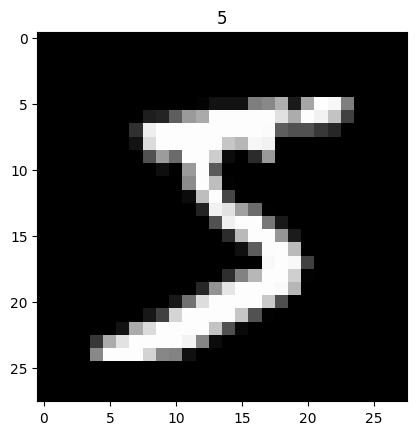

In [ ]:
# 시각화
import matplotlib.pyplot as plt

image = X_train[0]

plt.title(y_train[0])
plt.imshow(image, 'gray')
plt.show()

## 2. Keras를 이용한 모델링 - ⭐Fully Connected Layer 모델링 하기⭐
- `keras`는 `tensorflow`를 기반으로 하는 유명한 논문, 레이어들을 구현한 패키지

- FCL(Fully Connected Layer)의 역할 : 추론(예측)

### [참고사항]
- 딥러닝 원래 3개의 패키지 삼파전이었다.
  - Tensroflow
  - PyTorch
  - Keras
- Tensorflow에 Keras가 흡수됨/합쳐짐(인수)
- 인수 전에는 PyTorch에서도 Keras 사용이 가능했으나, 현재는 Keras를 사용하기 위해서는 TensroFlow를 사용할 수 밖에 없다.


### FCL 활용하기 위해 필요한 구성 레이어
- 레이어들은 `tf.keras.layers` 패키지에 모두 들어있다.

1. `Flatten Layer`
  - 배치(BATCH)를 제외한 평탄화 담당
  - `numpy` 할 때는 `reshape`, 배치 개수를 따로 빼주는 작업이 필요했는데 여기서는 `Flatten()(데이터)`로 해결할 수 있다.

2. `Dense Layer`
  - `Affine`연산(신경망의 행렬 내적 계산)
  -  **Fully Connected**
  - `Dense Layer`를 계속 쌓아가면서 입력값과 뉴런들을 모두 연결해 간다.
  - 즉, 모든 데이터를 모든 뉴런이 받을 수 있게 연결해주는 것이다.
  - 그래서 이러한 모델링 방식을 Fully Connected Layer라고 부른다.
  - `Dense Layer` 파라미터에 `activation`에 활성화 함수 지정 가능

3. `Activation Layer`
  - 활성화 함수 레이어
  - 옵션 사항으로 선택에 따라서 사용을 안할 수도 있다.

In [ ]:
## 모델생성을 위한 모델 계획 수립

from tensorflow.keras.layers import Dense, Flatten, Activation, Input

## 입력층(Input Layer) : 데이터가 입력되는 층
input = Input(shape=(28, 28))

## 평탄화 층(Flatten Layer)
net = Flatten()(input) # 평탄화가 된 데이터를 반환

## 은닉층(Hidden Layer) : 실제 wx+b의 연산이 일어나는 층(즉, 선형대수학적 내적 연산이 일어나는 층)
net = Dense(512)(net) # Dense Layer 사용. 평탄화된 데이터를 Dense에 집어 넣음 # 뉴런의 개수를 512개로 임의로 지정한 것
net = Activation("relu")(net) # 활성화 함수로 ReLu 지정(옵션)

# Dense Layer 한번 더 깊게
net = Dense(256)(net)
net = Activation("relu")(net)

## 출력층(Outpyt Layer) : 항상 마지막에 위치. 예측의 결과를 내보낸다.
# 출력층은 항상 Dense로 만든다.
net = Dense(10)(net) # 반드시 출력층의 뉴런(유닛)의 개수는 클래스의 개수가 되어야 한다! # 숫자 이미지 분류를 위해 10개 지정
y = Activation("softmax")(net)

### 1.입력층(Input Layer) - 데이터 입력
- 데이터가 입력되는 층
- 데이터의 입력이 어떻게 될 것인지 미리 알려주는 것
- 모델이 정해진 모양으로 들어올 수 있도록 정해주는 것
- Batch(배치) 사이즈를 제외한 데이터의 순수한 shape를 지정해주면 된다.
  - 현재 데이터셋에서는 이미지 데이터의 크기를 지정한 것으로 볼 수 있겠다.
- 아직 모델에 들어올 배치(데이터의 총 개수)는 지정하지 않은 상태로 모델을 계획하며 레이어를 준비하고 있는 것이다.

### 2. 평탄화층(Flatten Layer) - 입력 데이터의 평탄화
- `Danse Layer`가 되기 위해서는 반드시 평탄화(Flatten)이 되어야 한다.(거의 공식처럼 외우기)
- 3차원 배열인 피처와 2차원 배열인 가중치 배열인 뉴런과 내적 연산을 위해 평탄화
  - $(N, H, W) \rightarrow (N, H × W)$
  - H와 W는 데이터의 개수와 관계 없음
  - 데이터의 개수(N)을 의미하는 (Batch)는 내적에서 필요하기 때문에, 배치를 제외한 데이터의 순수한 shape만 평탄화해준다.
  - 3차원 배열의 내적을 위한 방법이 따로 있기는 하지만 여기서는 다루지 않음
  - 비정형 데이터를 다룰 때도 N 이외의 뒤에 나오는 차원들은 평탄화 작업이 필요함.



### 3. 은닉층(Hidden Layer) - 평탄화한 입력 데이터를 `dense layer`에 넣고 활성 함수 적용
- 실제로 `Affine`연산(신경망의 행렬 내적 계산)이 일어나는 충
  - ex. $wx+b$
- `dense layer` 로 데이터와 뉴런을 연결해주고 내적의 결과값이 나오게 된다.
- `dense layer`의 shape : `(평탄화된 데이터의 개수, 뉴런의 개수)`
  - 평탄화된 입력 데이터 행렬과 내적을 할 수 있도록 가중치 행렬을 구성
  - 평탄화된 입력 데이터 행렬의 shape는 `(N, 784)`
  - 해당 데이터를 위한 `dense layer`에는 `(784, 뉴런의 개수)` 배열이 생성되어 두 행렬의 내적 연산을 계산하여 은닉층에서 `(N, 뉴런의 개수)` shape의 배열을 가진다.
  - 뉴런의 개수는 임의로 지정할 수 있다.
- `Activation layer` 에서 데이터에 활성화 함수가 적용되어도 `(N, 뉴런의 개수)` shape가 변하지는 않는다.


### 4. 출력층(Output Layer) - 데이터를 `dense layer`에 넣고 최종적으로 `softmax` 활성 함수 적용
- 가장 마지막의 위치하는 레이어로 예측의 결과를 내보낸다.
- 출력층은 반드시 `dense layer`로 만든다.
- 출력층의 뉴런(유닛)의 개수는 반드시 타겟 클래스의 개수가 되어야 한다.
  - `net = Dense(10)(net)` : 숫자 이미지 분류를 위해 0 ~ 9까지 10개로 지정
- 출력층의 `Activation Layer`에서 적용한 활성화 함수 **softmax**
  - 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며, 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수
  - 분류하고 싶은 클래수의 수 만큼 출력으로 구성한다.
  - 즉,  **각 클래스로 분류될 확률**을 반환한다.
  - 가장 큰 출력 값을 부여받은 클래스가 확률이 가장 높은 것으로 이용된다.



---

- 다차원 배열(Tensor)인 입력 데이터가 계속 흘러가고(flow) 있다는 것을 확인할 수 있다.
  - 각 층에서 반환한 데이터를 다음 층으로 계속해서 전달하고 있다.
  
- 각 레이어별 행렬의 모양(shape)을 표현할 수 있도록 연습해보면 좋다.

- 위 실습 코드에서는 뉴런의 개수를 줄이는 탑다운방식으로 하고 있다.
  - 데이터나 모델에 따라서 줄일지 늘릴지를 정하는 것은 다를 수 있다.

- 은닉층의 깊이는 임의로 지정하는 것
  - 데이터에 따라 은닉층을 더 깊게 설정하는 것이 좋을 수 있다.
  - 은닉층이 깊어지면 과대적합이 될 수도 있다.

### 파라미터 최적화 이슈
- 딥러닝에서의 가장 큰 이슈는 레이어의 개수/유닛의 개수를 어떻게 하면 최적화 할 수 있을까이다.
  - 지금은 가벼운 데이터/레이어로 빠르게 테스트할 수 있지만, 실무에서 데이터의 개수가 많고 복잡한 데이터를 다룰 경우, 테스트를 수행하는데 아주 오랜 시간이 걸린다.(몇 일 혹은 몇 주가 걸리는 경우도 있다.)
- 아직 확실한 최적화가 불가능한 영역이기 때문에, 적용할 파라미터로서 딥러닝 관련 논문을 참고하는 것이 좋다.
  - 보통 딥러닝 논문에서는 최적의 파라미터를 찾는 연구 내용을 담고 있다.
  - 최적화 관련 논문의 구현 모델을 `keras`에서 지원하고 있다.
  - 직접 파라미터 값을 찾기보다는 `keras` 지원하는 논문 및 대회 모델을 활용하는 것이 훨씬 경제적이다.
  - 딥러닝을 깊게 파다보면, 논문 등에서 구현한 모델과 다르게 수정해줘야 할 부분이 생길 수 있다.
  - 우리는 깊게 배우진 않기 때문에 그냥 사용방법 위주로 보겠다.

### 모델 생성

In [ ]:
## 모델 생성

# 입력층과 출력층 지정
model = tf.keras.Model(inputs=input, outputs=y, name="BASIC_MNIST") # 이름 임의로 지정 가능

# 모델의 요약된 결과 확인
model.summary()

Model: "BASIC_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                

- 모델에는 입력 데이터가 각 층들에 전달받아 출력 데이터로 나오는 모든 과정이 함께 포함된다.
- 모델은 각 층에서 데이터에 대한 계산 그래프에 대한 정보도 모두 포함한다.
- 어떤 과정으로 데이터를 다룰지 모델의 계획을 수립하여 한 상태로, 아직 모델의 데이터를 학습시키지 않은 상태이다.
  - 모델의 요약결과를 확인하면, 아직 모델에 데이터를 입력(학습)하지 않았기 때문에 None으로 나온다.

## 3. 모델 학습을 위해 최적화 계획 세우기
1. ⭐`Loss Function`(손실 함수) - MSE, CEE를 쓸지를 결정
  - 딥러닝에서는 MSE는 거의 쓰지 않고 CEE(Cross Entropy Error)를 사용
  - CEE는 손실함수 중 하나로 교차 엔트로피 오차. 따로 자세히 다루지는 않겠다.

2. ⭐`Optimization`(최적화 함수) - SGD, ADAM, RMSProps 등을 지정
  - 최적화 함수 중 경사 하강법(Gradient Descending)을 선정하는 것
  - 거의 대부분 ADAM, RMSProps 등을 기본으로 사용한다.
    - 초보자에게 ADAM 쉽고 기본 옵션으로 사용하기 좋다.
    - 두 함수 중 하나만 사용해도 왠만한 성능을 보장한다.
  
3. `Metrics` - 테스트 세트에 대한 평가 기준
  * `acc`, `recall`, `precision`

### 1. Loss Function 선정 기준
* 이진 분류를 수행하는 경우(Binary Classification)
  - MSE : 출력층의 뉴런이 1개인 경우 - with `sigmoid` 함수
  - CEE : 출력층의 뉴런이 2개인 경우 - with `softmax` 함수
    - 제일 자주 사용되는 방법
    - **`binary_crossentropy`**를 사용하면 된다.
* 다중 분류를 수행하는 경우(Multiclass Classification)
  - CEE : 출력층의 뉴런을 클래스의 개수만큼 설정
  - Categorical Cross Entropy를 사용하면 된다.
    - Label이 `[0, 1, 2]` 처럼 One-Hot Encoding이 되어있지 않은 경우 **`sparse_categorical_crossentropy`**를 사용
    - Label이 One-Hot Encoding이 되어있는 경우 **`categorical_crossentropy`**를 사용하면 된다.


In [ ]:
# 클래스의 개수가 10개이므로, 출력층의 뉴런의 개수는 10개로 모델을 생성한 상태이다. => Categorial Cross Entropy 사용
# 어떤 Loss Function을 사용할지 y_tain 확인
y_train.shape, y_train[:3]

((60000,), array([5, 0, 4], dtype=uint8))

- `y_train` 확인 결과, Label Encoing이 되어 있고 OHE(One-Hot Encoding)이 되어있지 않기 때문에 `sparse_categorical_crossentropy` 사용하면 된다.

In [ ]:
# Loss Function - sparse_categorical_crossentropy 사용
loss_func = tf.keras.losses.sparse_categorical_crossentropy
loss_func

<function keras.src.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1, ignore_class=None)>

In [ ]:
# 만약에 y_train이 OHE(One Hot Encoding)이 되어 있으면? categorical_crossentropy 사용
tf.keras.losses.categorical_crossentropy

In [ ]:
# 이진 분류라면? binary_crossentropy
tf.keras.losses.binary_crossentropy

### 2. Optimizer 설정하기
- 경사하강법 방식을 선정하는 단계
* SGD- `tf.keras.optimizers.SGD()`
* RMProps - `tf.keras.optimizers.RMSprop()`
* ADAM - `tf.keras.optimizers.Adam()`
  - 일반적으로 제일 많이 사용하는 최적화 기법
  - 다른 방식의 장점들을 합쳐놓았기 때문에, 무엇을 쓸지 모르겠다면 ADAM을 사용하는 것을 권장

In [ ]:
# optimizer - Adam 사용하기
optm = tf.keras.optimizers.Adam()
optm

### 3. 테스트 세트 평가방법(Metrics) 선정하기
- 테스트 세트의 평가방식( evaluate )

In [ ]:
# 일반적으로 accuracy를 제일 많이 사용한다.
metrics = ['accuracy']

## 4. 모델 컴파일(Compile)
- `Tensorflow`로 데이터를 진짜로 흘려보내기 전에, 즉 모델에 데이터 훈련(`Tensorflow` 세션에 위치한 계산그래프에 데이터를 입력) 직전에 컴파일을 수행한다.
- **훈련에 필요한 전반적인 옵션을 모델에 적용하는 과정**
  - 위에서 설정한 손실함수, 최적화, 평가방법을 실제 계산그래프에 적용한다.

In [ ]:
model.compile(
    optimizer=optm,
    loss=loss_func,
    metrics=metrics
)

## 5. 모델 훈련

In [ ]:
model.fit(
    X_train, # 훈련 X 데이터(Feature)
    y_train, # 훈련 y 데이터(target)
    batch_size=32, # 미니 배치 사이즈. 한 번에 훈련할 데이터의 개수
    epochs=10, # 모든 데이터에 대한 학습 회수를 의미. 미니 배치를 이용해서 모든 데이터를 훈련하면 1에폭.
    shuffle=True, # 데이터를 섞어가면서 훈련하겠다는 의미
    validation_split=0.2 # 검증 세트의 비율 - 1에폭마다 검증 세트의 비율을 20%씩 사용
)

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 1.6770 - accuracy: 0.8963 - val_loss: 0.2498 - val_accuracy: 0.9408
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2178 - accuracy: 0.9427 - val_loss: 0.2208 - val_accuracy: 0.9471
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1767 - accuracy: 0.9529 - val_loss: 0.1674 - val_accuracy: 0.9563
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1540 - accuracy: 0.9581 - val_loss: 0.1638 - val_accuracy: 0.9578
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1384 - accuracy: 0.9624 - val_loss: 0.2077 - val_accuracy: 0.9526
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1307 - accuracy: 0.9653 - val_loss: 0.2038 - val_accuracy: 0.9565
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1210 - accuracy: 0.9689 - val_loss: 0.1871 - val_accuracy

### `batch_size`
- 미니 배치(Batch) 사이즈. 한 번에 훈련할 데이터의 개수
- `batch_size=32` : 한 번에 전체 데이터(60000개)를 적용하는 것은 너무 무겁기 때문에, 가지고 있는 데이터의 중 32개씩 나눠서 데이터로 훈련하도록 지정
- 논문에서 연구되는 배치 사이즈 국민 옵션 : 32 or 64를 많이 사용
  - 데이터 양이 적으면 32도 충분
  - 데이터 양이 너무 많으면 128까지 사용하기도 한다.

### `epochs`
- 모든 데이터에 대한 학습 회수를 의미
- `batch_size=32`로 지정했기 때문에 전체 데이터 60000개를 미니배치로 모든 데이터를 훈련하면 1,875이다. 즉, 현재 모델의 1에폭=1875인 것이다.
- `epochs=10`로 지정했기 때문에 에폭을 10번 반복하는 것을 의미한다. 즉, 전체 데이터에 대한 훈련을 10번 반복하는 것이다.
- 에폭이 클 수록 모든 데이터를 훈련하는 횟수가 많아지게 된다.

## 6. 모델 예측
- 훈련할 때의 데이터의 모양과 예측할 때 데이터의 모양이 반드시 같은 모양으로 예측해야 한다.

In [ ]:
## 테스트 데이터로 예측을 수행 훈련 - 예측 데이터가 왜 같은 모양의 데이터로 입력해야 하는지 확인
test_image = X_test[0]
test_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# 바로 데이터를 넣으면 오류가 난다.
model.predict(test_image)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'BASIC_MNIST' (type Functional).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28)
    
    Call arguments received by layer 'BASIC_MNIST' (type Functional):
      • inputs=tf.Tensor(shape=(None, 28), dtype=uint8)
      • training=False
      • mask=None


- 모델 생성시 입력층에 (N, 28, 28)로 입력했는데, 위 테스트 데이터는 (28, 28)이기 때문에 데이터의 shape가 달라서 오류가 발생한다.
- 강제로 3차원으로 변환해주는 작업이 필요하다.

In [ ]:
#  newaxis로 강제로 축 추가 - 배치에 대한 차원을 강제로 증가 (28, 28) => (N, 28, 28)
test_image = test_image[tf.newaxis, :, :]
test_image.shape

(1, 28, 28)

In [ ]:
# 데이터의 차원을 3차원으로 변환을 하면 모델 예측이 가능하다.
result = model.predict(test_image)
result

1/1 [==============================] - 0s 80ms/step


array([[3.1687180e-18, 3.1723372e-05, 4.0023636e-08, 1.5820699e-06,
        2.8080518e-10, 1.0846264e-13, 7.7905916e-25, 9.9979466e-01,
        5.0085630e-12, 1.7204156e-04]], dtype=float32)

- `result`는 `softmax` 함수의 결과물이다. 즉, 각 클래스에 대한 확률이 반환된 것이다.

In [ ]:
result.sum(), result.argmax(axis=1)

(1.0, array([7]))

- `argmax()` 배열에서 가장 큰 값이 있는 인덱스 의미
- 가장 값이 큰 인덱스는 7로 나왔고 `array([7])`는 `9.9979466e-01`로 거의 99% 확률로 해당 클래스일 것이라고 예측한 것이다.